# Univariate linear regression with gradient descent

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Debugging
import sys
import logging
DEBUG_MODE = False
logging.basicConfig(level=logging.DEBUG if DEBUG_MODE else logging.INFO, stream=sys.stdout)
logging.getLogger().setLevel(logging.DEBUG if DEBUG_MODE else logging.INFO)

## Load data

In [23]:
# Load data
df = pd.read_csv('data.csv')
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
df.head()

,X,Y
0,0.00000,8.528105
1,0.10101,6.002335
2,0.20202,7.361516
3,0.30303,10.087847
4,0.40404,9.543197


<Figure size 640x480 with 0 Axes>

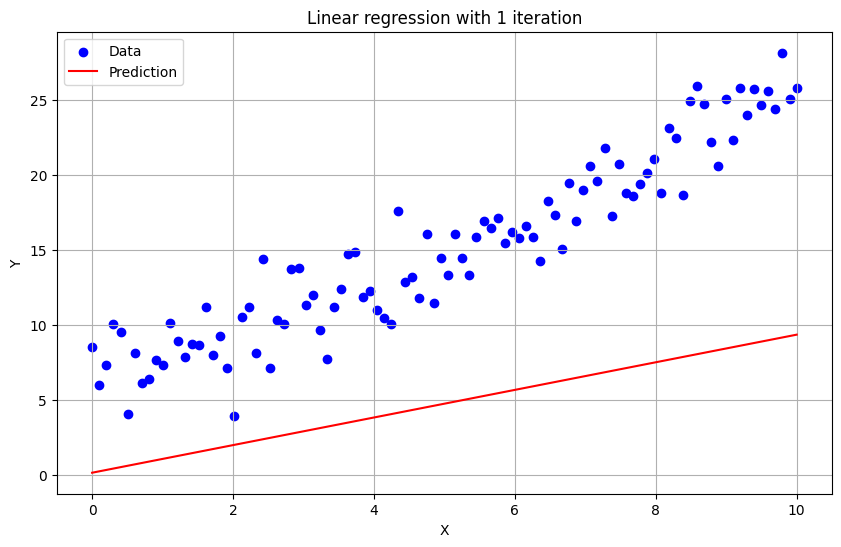

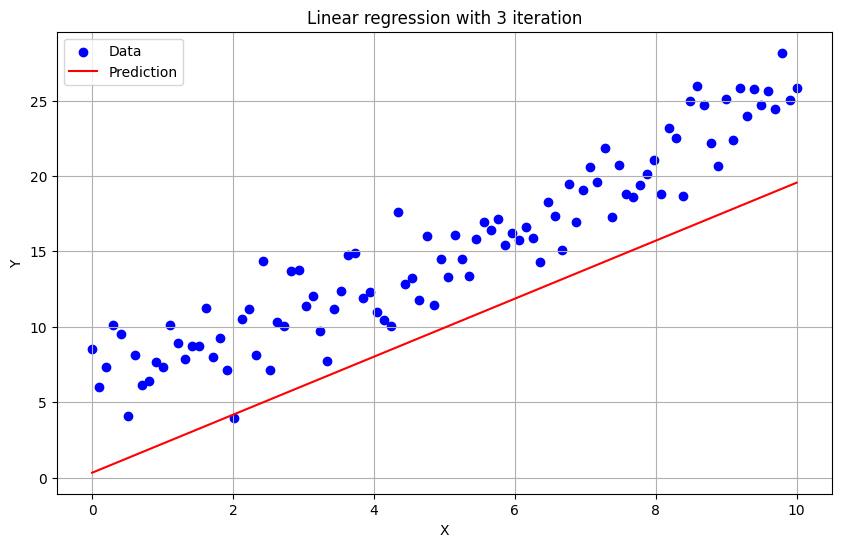

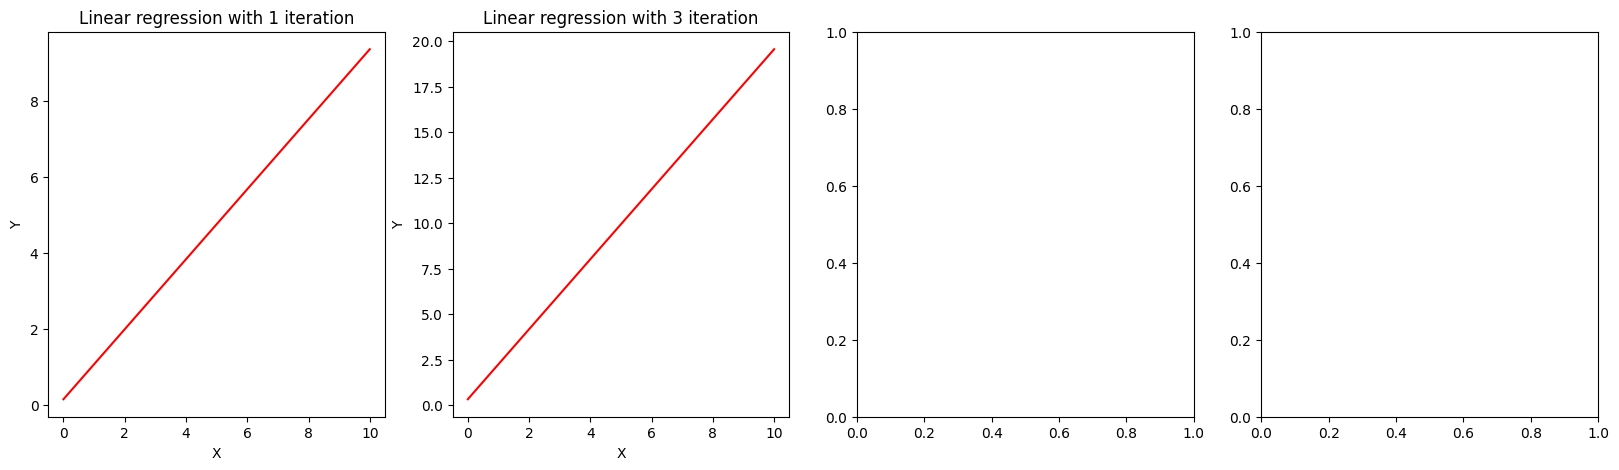

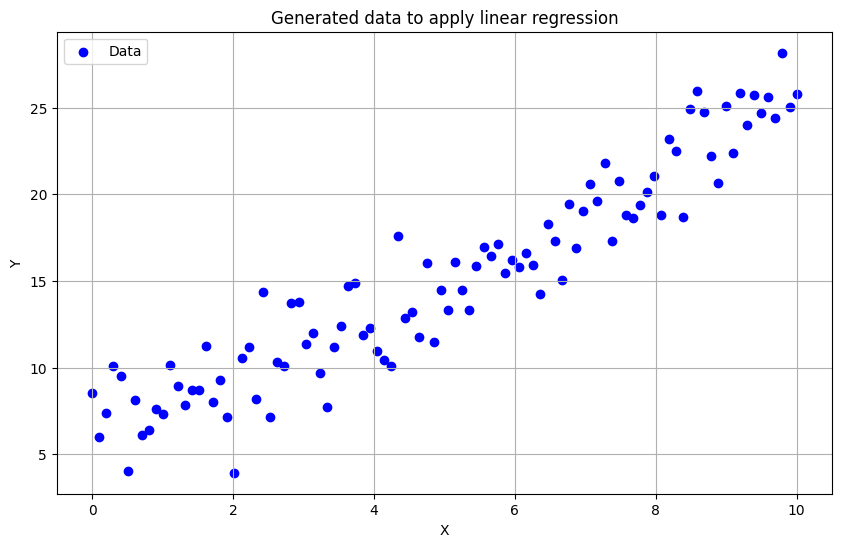

<Figure size 640x480 with 0 Axes>

In [31]:
# Display data
def display_data(title, x, y, pred_y=None, show=True):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data')
    if pred_y is not None:
        plt.plot(x, pred_y, color='red', label='Prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    if show:
        plt.show()
    # To be able to draw all plots together
    return plt.gcf()
display_data('Generated data to apply linear regression', x, y, None)

### First using sklearn to compare the results

In [32]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

<Figure size 640x480 with 0 Axes>

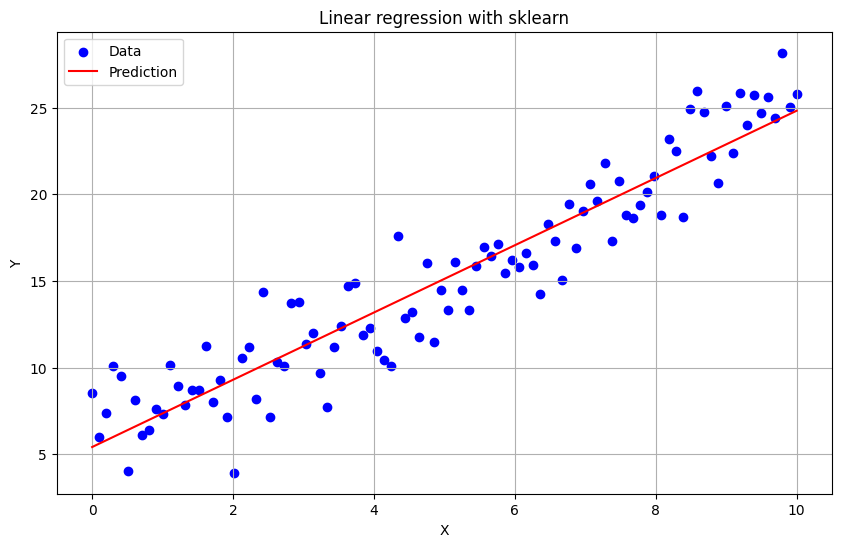

In [33]:
pred_y = lr.predict(x.reshape(-1, 1))
fig4 = display_data('Linear regression with sklearn', x, y, pred_y)

## Linear regression with pure Python and batch gradient descent (not vectorized)

In [34]:
class PurePythonLinearRegression:
    def __init__(self):
        self.weights = self.initialize_weights()

    def initialize_weights(self):
        return [0, 0]

    # This is how gradient descent minimizes the loss function
    # As it gets closer to the minimum, the derivatives will also approach zero
    # which slows down each step automatically
    def update_weights(self, learning_rate, x, y):
        new_weight0 = self.weights[0] - learning_rate*self.derivative_of_loss_function_wr_weight0(x, y)
        new_weight1 = self.weights[1] - learning_rate*self.derivative_of_loss_function_wr_weight1(x, y)
        return [new_weight0, new_weight1]

    # Predicts what the y value is from x, using the weights (trained or not)
    def weighted_prediction(self, x):
        logging.debug({
            'function': 'weighted_prediction',
            'x': x,
            'weights': self.weights
        })
        return self.weights[1]*x + self.weights[0]

    # How far are the predictions from the real values of y
    # Squared error loss function - good because it's convex
    def loss_function(self, x, y):
        total_distance = 0
        for i in range(len(x)):
            pred_y_i = self.weighted_prediction(x[i])
            total_distance += (pred_y_i - y[i])**2
            logging.debug({
                'function': 'loss_function',
                f'x[{i}]': x[i],
                f'y[{i}]': y[i],
                f'pred_y[{i}]': pred_y_i,
                'total_distance': total_distance
            })
        return (1/(2*len(x)))*total_distance

    # This is not needed when there's auto differentiation
    # The derivative of the loss is what'll guide the gradient descent to down the loss function
    def derivative_of_loss_function_wr_weight0(self, x, y):
        m = len(x)
        total_sum = 0
        for i in range(m):
            pred_y_i = self.weighted_prediction(x[i])
            total_sum += (pred_y_i - y[i])
        return (1/m)*total_sum
    def derivative_of_loss_function_wr_weight1(self, x, y):
        m = len(x)
        total_sum = 0
        for i in range(m):
            pred_y_i = self.weighted_prediction(x[i])
            total_sum += (pred_y_i - y[i])*x[i]
        return (1/m)*total_sum

    # Named train because it's iterative (unlike fit, probably)
    # The goal is to find the weights which minimize the loss function (distance between predictions and real values)
    def train(self, x, y, iterations=10, learning_rate=0.1):
        self.weights = self.initialize_weights()

        # Batch gradient descent happens here
        # "Batch" because it uses all training examples
        current_loss = self.loss_function(x, y)
        for i in range(0, iterations):
            logging.info(f'Iteration {i}/{iterations}\tLoss: {current_loss}')
            self.weights = self.update_weights(learning_rate, x, y)
            current_loss = self.loss_function(x, y)
        
        logging.info(f'Iteration {i+1}/{iterations}\tLoss: {current_loss}')
    

INFO:root:Iteration 0/10	Loss: 132.32530314547236
INFO:root:Iteration 1/10	Loss: 60.13788363362577
INFO:root:Iteration 2/10	Loss: 28.92522434438677
INFO:root:Iteration 3/10	Loss: 15.424376670691009
INFO:root:Iteration 4/10	Loss: 9.579688199461703
INFO:root:Iteration 5/10	Loss: 7.044498065701254
INFO:root:Iteration 6/10	Loss: 5.939916553433009
INFO:root:Iteration 7/10	Loss: 5.453773768581957
INFO:root:Iteration 8/10	Loss: 5.235000588260793
INFO:root:Iteration 9/10	Loss: 5.131843508796968
INFO:root:Iteration 10/10	Loss: 5.078705283069699


<Figure size 640x480 with 0 Axes>

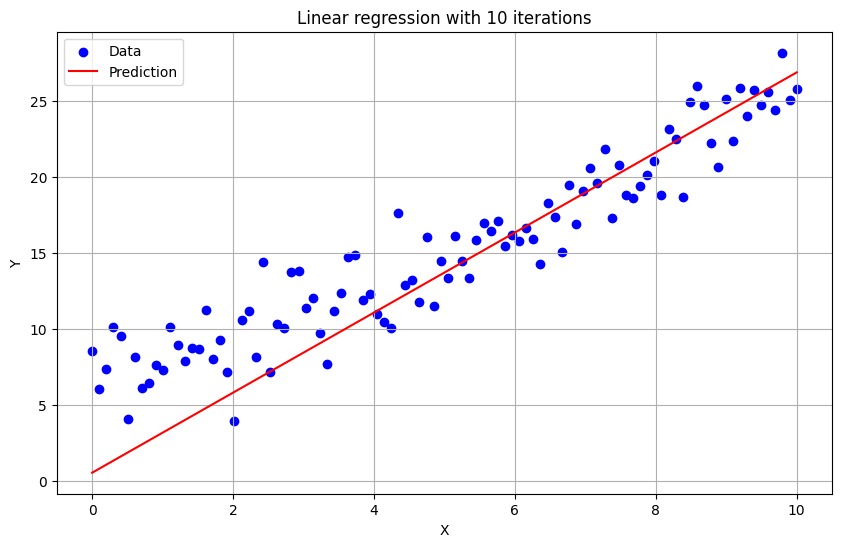

In [35]:
lr = PurePythonLinearRegression()
lr.train(x, y, iterations=10, learning_rate=0.01)
pred_y = lr.weighted_prediction(x)
fig3 = display_data('Linear regression with 10 iterations', x, y, pred_y)

In [36]:
# Just to show how different numbers of iterations affect the line position
lr2 = PurePythonLinearRegression()
lr2.train(x, y, iterations=1, learning_rate=0.01)
lr3 = PurePythonLinearRegression()
lr3.train(x, y, iterations=3, learning_rate=0.01)

pred_y2 = lr2.weighted_prediction(x)
pred_y3 = lr3.weighted_prediction(x)

fig1 = display_data('Linear regression with 1 iteration', x, y, pred_y2, show=False)
fig2 = display_data('Linear regression with 3 iteration', x, y, pred_y3, show=False)

INFO:root:Iteration 0/1	Loss: 132.32530314547236
INFO:root:Iteration 1/1	Loss: 60.13788363362577
INFO:root:Iteration 0/3	Loss: 132.32530314547236
INFO:root:Iteration 1/3	Loss: 60.13788363362577
INFO:root:Iteration 2/3	Loss: 28.92522434438677
INFO:root:Iteration 3/3	Loss: 15.424376670691009


In [37]:
stored_figs = [fig1, fig2, fig3, fig4]


# Display all plots together
def display_all_together(figures):
    n = len(figures)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))
    
    for i, ax in enumerate(axs):
        for line in figures[i].axes[0].lines:
            ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        ax.set_title(figures[i].axes[0].get_title())
        ax.set_xlabel(figures[i].axes[0].get_xlabel())
        ax.set_ylabel(figures[i].axes[0].get_ylabel())
    
    plt.tight_layout()
    plt.show()

display_all_together(stored_figs)

IndexError: list index out of range

## Linear regression with numpy and gradient descent (vectorized)

## Linear regression using tensors and auto differentiation (vectorized)